In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=3, random_state=42)

<ipython-input-10-cad1c1107ce1>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0],X[:,1],s=50,cmap='viridis')


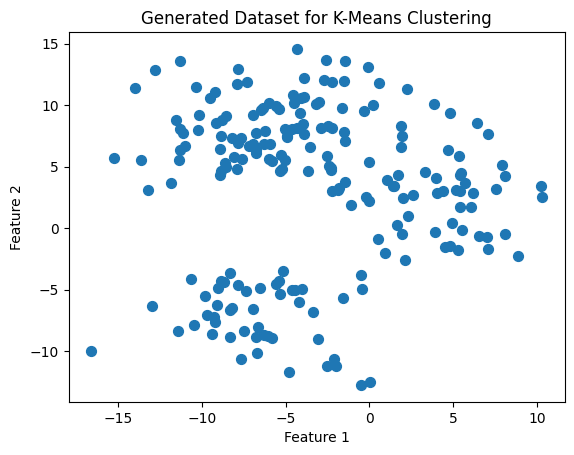

In [10]:
plt.scatter(X[:,0],X[:,1],s=50,cmap='viridis')
plt.title("Generated Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [15]:
#Using Elbow Method
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_init=10,n_clusters=i,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [13]:
wcss

[15770.431986500913,
 8512.74134422148,
 3816.2105791570375,
 2909.5275409342157,
 2527.156897911191,
 2167.7891752850883,
 1877.2397922195364,
 1623.2334022572302,
 1439.5575816988558,
 1279.7715406992068]

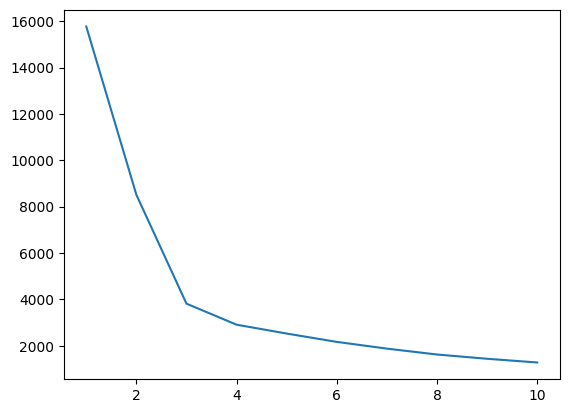

In [14]:
plt.plot(range(1,11),wcss)

In [16]:
#Using Silhouette_Score
from sklearn.metrics import silhouette_score
sil = []
for i in range(2,11):
  km = KMeans(n_clusters=i)
  cluster_labels = km.fit_predict(X)
  sil_score = silhouette_score(X,cluster_labels)
  sil.append(sil_score)

In [17]:
sil

[0.4280191125138295,
 0.5416338645518883,
 0.44881980404267646,
 0.41866686424486227,
 0.3957063365757844,
 0.367493484239547,
 0.3727373268418129,
 0.37087040181225644,
 0.35995215229971683]

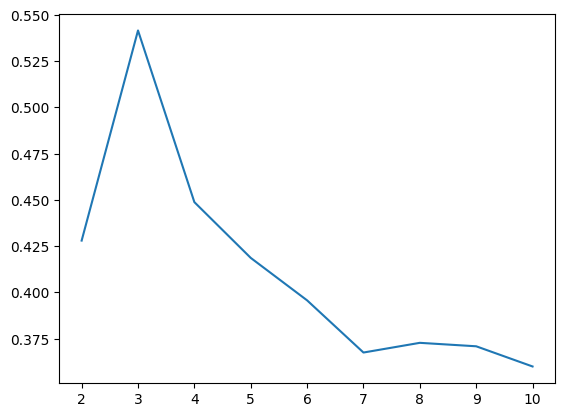

In [19]:
plt.plot(range(2,11),sil)

In [21]:
km2 = KMeans(n_init=10,n_clusters=4,verbose=100)
km2

KMeans(n_clusters=4, n_init=10, verbose=100)

In [22]:
km2.fit(X)

Initialization complete
Iteration 0, inertia 3899.6307463680787.
Iteration 1, inertia 3033.7974110951036.
Iteration 2, inertia 2982.742359017756.
Iteration 3, inertia 2971.144200368784.
Iteration 4, inertia 2965.90420144999.
Iteration 5, inertia 2948.8890957337185.
Iteration 6, inertia 2925.245287745203.
Iteration 7, inertia 2919.484475103354.
Iteration 8, inertia 2913.610761191712.
Iteration 9, inertia 2909.6642254380017.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 3844.576702166267.
Iteration 1, inertia 3056.104677258927.
Iteration 2, inertia 2970.2647382186706.
Iteration 3, inertia 2953.6265501069665.
Iteration 4, inertia 2945.2338167671537.
Iteration 5, inertia 2937.1976677737593.
Iteration 6, inertia 2934.4352915355644.
Iteration 7, inertia 2920.995742014518.
Iteration 8, inertia 2911.921867938481.
Iteration 9, inertia 2910.4186882735144.
Iteration 10, inertia 2909.8443692359347.
Converged at iteration 10: strict convergence.
Initiali

KMeans(n_clusters=4, n_init=10, verbose=100)

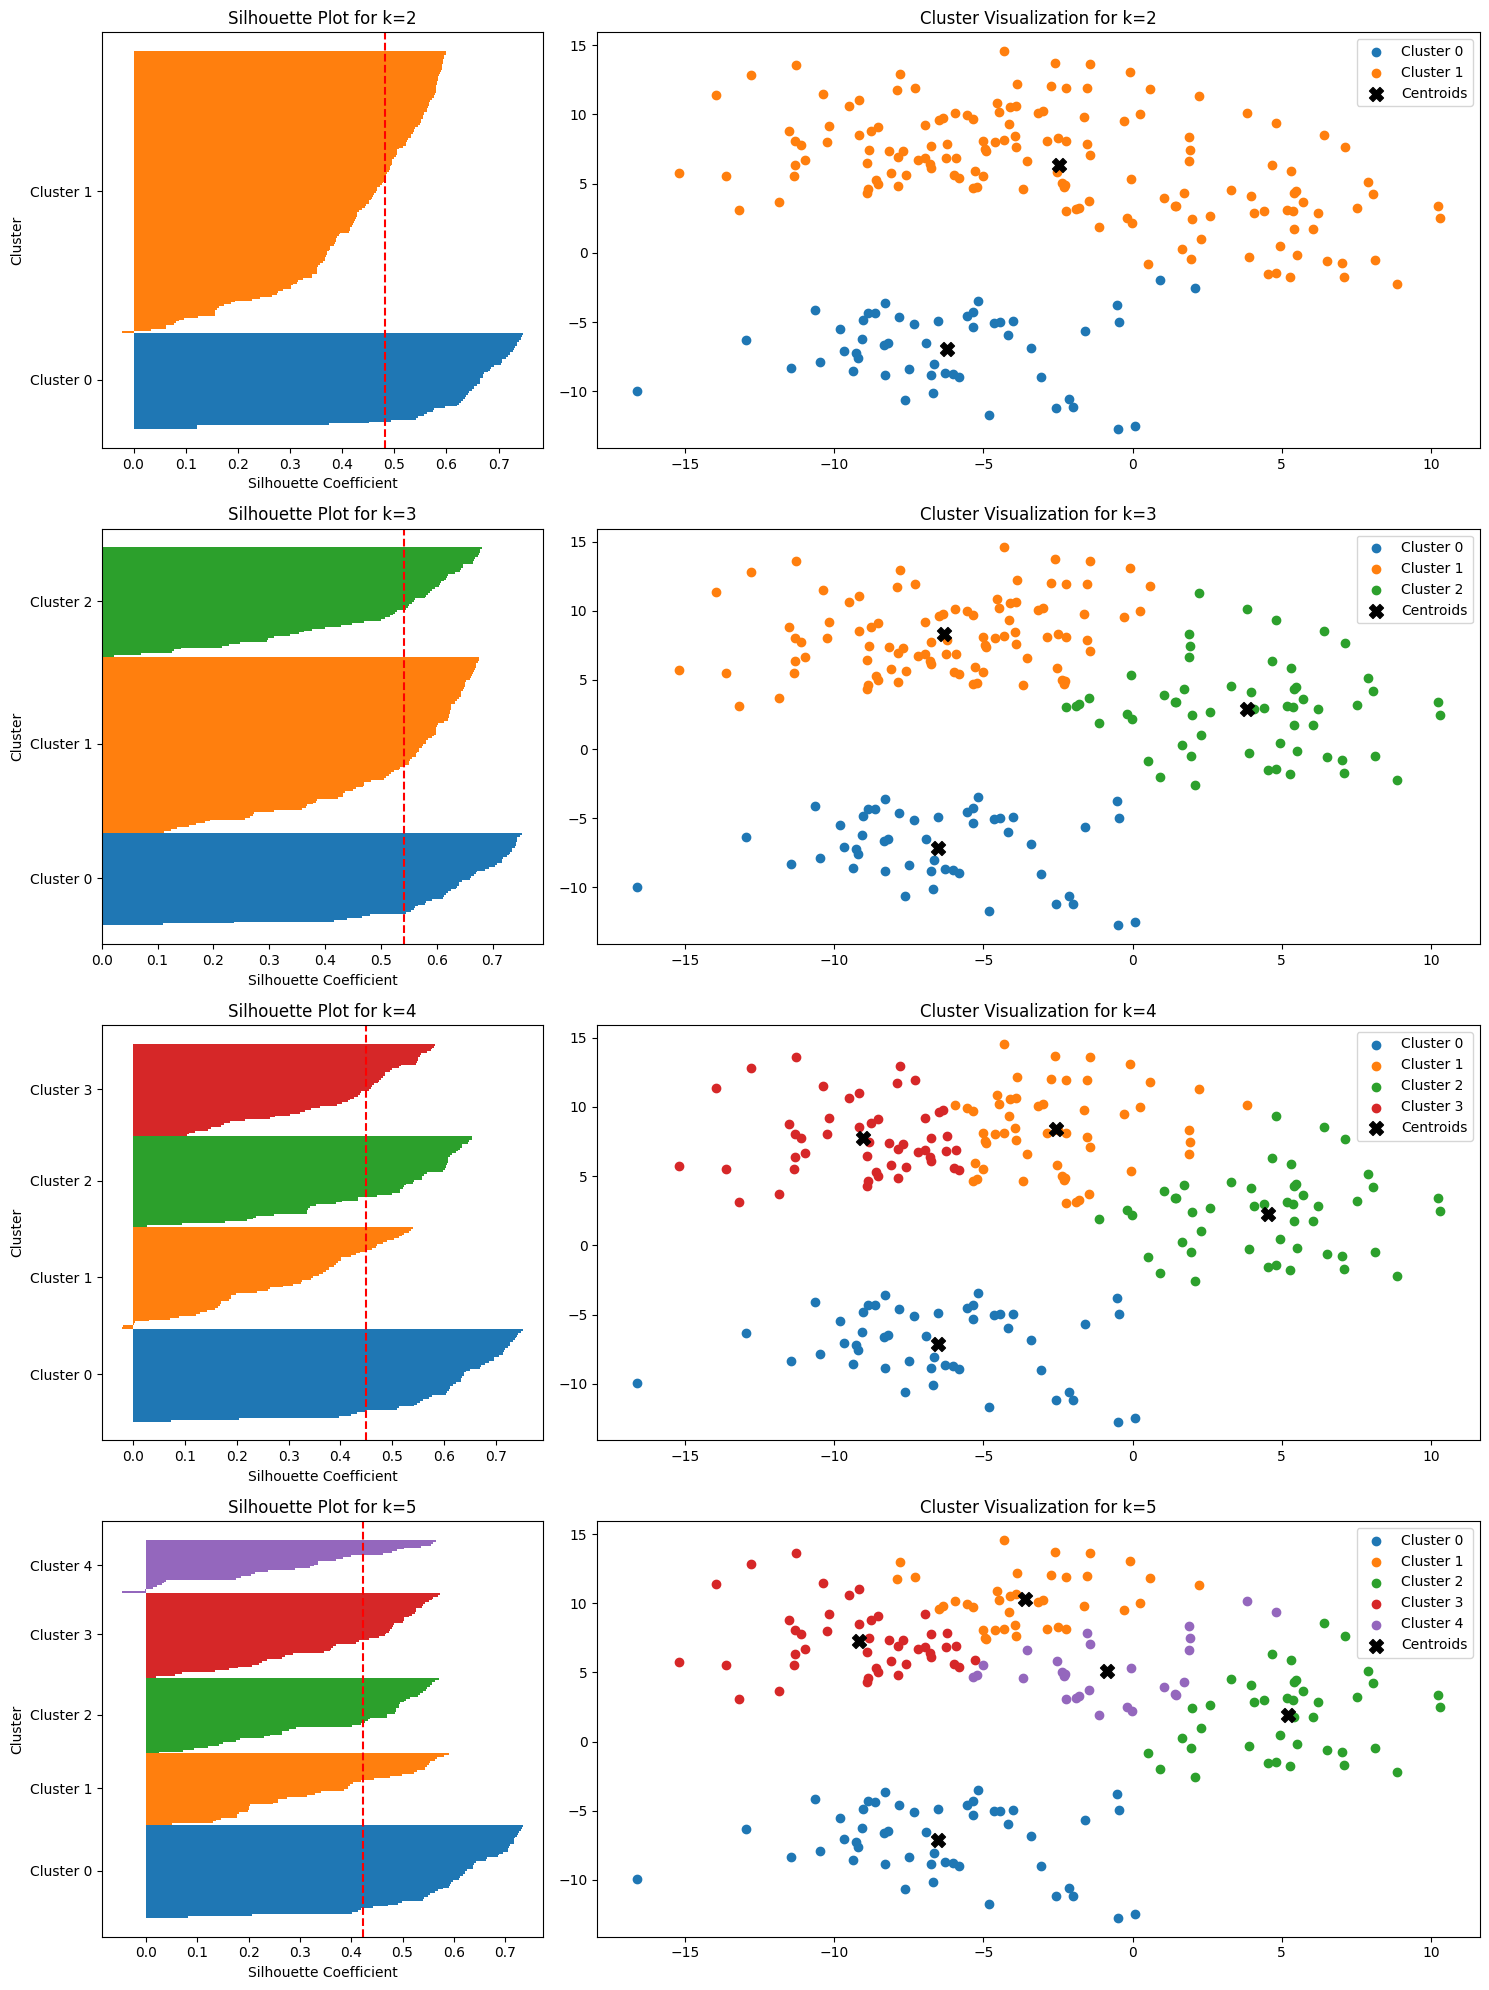

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


# Setting up the subplot grid
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

# Creating silhouette and scatter plots for different values of k (2, 3, 4, 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Clustering with k-means
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette values
    silhouette_vals = silhouette_samples(X, cluster_labels)
    avg_score = silhouette_score(X, cluster_labels)

    # Silhouette plot
    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')

    # Scatter plot
    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()


In [27]:
y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans

array([2, 3, 3, 3, 0, 0, 2, 3, 4, 0, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0,
       3, 4, 3, 1, 1, 0, 4, 2, 0, 0, 3, 3, 1, 2, 3, 2, 3, 4, 0, 1, 0, 0,
       3, 2, 2, 0, 2, 1, 4, 1, 3, 2, 3, 1, 0, 0, 1, 4, 3, 4, 0, 3, 3, 0,
       4, 4, 3, 1, 4, 3, 4, 0, 2, 0, 4, 1, 4, 1, 4, 2, 0, 3, 3, 3, 3, 1,
       2, 3, 0, 3, 4, 2, 2, 3, 1, 2, 0, 4, 1, 3, 4, 0, 1, 2, 1, 0, 0, 3,
       2, 0, 4, 3, 1, 3, 1, 3, 1, 1, 4, 0, 2, 3, 1, 2, 1, 2, 2, 1, 0, 0,
       4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 3, 4, 2, 1, 2, 3, 0, 0, 3, 3, 2, 3,
       0, 1, 3, 2, 2, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0, 2, 4, 1, 0, 0, 2, 0,
       4, 1, 1, 0, 1, 0, 3, 3, 1, 4, 2, 2, 2, 1, 4, 0, 3, 3, 4, 1, 2, 1,
       0, 4], dtype=int32)

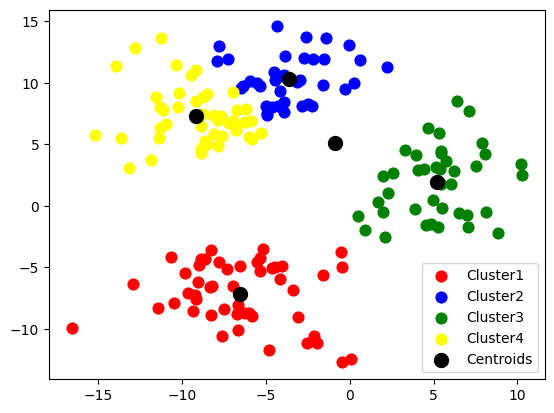

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.show()